<a href="https://colab.research.google.com/github/Diana9908/TP547/blob/main/Trabalho%202/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Exercicio 1
import numpy as np
import random

vermelhas = ['vermelha'] * 10
azuis = ['azul'] * 10
amarelas = ['amarela'] * 10
roxas = ['roxa'] * 10

quant_vm = list()
quant_az = list()
quant_am = list()
quant_rx = list()

extracoes = 8               # Número de bolas extraídas por iteração
iteracoes = 100000          # Número total de iterações Monte Carlo

for iteracao in range(iteracoes):
  # Reconstrói o chapéu no início de cada iteração
  chapeu = vermelhas + azuis + amarelas + roxas
  # Contadores locais para cada cor nesta iteração
  quant_vermelho = 0
  quant_azuis = 0
  quant_amarelas = 0
  quant_roxas = 0
  # Extrai bolas uma a uma
  for i in range(extracoes):
    # Escolhe aleatoriamente uma bola
    bola = random.choice(chapeu)
    # Atualiza o contador conforme a cor da bola extraída
    if bola in vermelhas:
      quant_vermelho += 1
    elif bola in azuis:
      quant_azuis += 1
    elif bola in amarelas:
      quant_amarelas += 1
    else:
      quant_roxas += 1

    # Para simular sem reposição, descomente a linha abaixo:
    #chapeu.remove(bola)

  # Armazena os resultados desta iteração
  quant_vm.append(quant_vermelho)
  quant_az.append(quant_azuis)
  quant_am.append(quant_amarelas)
  quant_rx.append(quant_roxas)

quant_az = np.array(quant_az)
quant_rx = np.array(quant_rx)

# Máscara booleana: True quando saiu mais de uma bola azul e violeta
mask_azules_roxas = (quant_az >= 1) & (quant_rx >= 1)
# Cálculo da probabilidade
P = np.sum(mask_azules_roxas)/iteracoes
print(P)


0.80574


In [53]:
# Exercício 2
import numpy as np
import random

dado = (1,2,3,4,5,6)
iteracoes = 100000
suma = list()

for iteracao in range(iteracoes):
  # Sorteia a face dos dados
  d1 = random.choice(dado)
  d2 = random.choice(dado)
  # Soma dos dois lançamentos
  suma.append(d1 + d2)

suma = np.array(suma)
# Máscara booleana: True onde a soma é ≥ 10
mask = suma >= 10
# Cálculo da probabilidade
P = np.sum(mask)/iteracoes
print(P)


0.16584


In [54]:
# Exercício 3
import numpy as np
import random

jogadas = 100                     # Máximo de apostas por simulação
iteracoes = 10000                 # Simulações Monte Carlo
capital_inicial = 10              # Capital inicial

dado = (1, 2, 3, 4, 5, 6)
ganho_neto = list()               # Lucro líquido total por simulação
ganho_medio_jogadas = list()      # Lucro médio por aposta em cada simulação

for i in range(iteracoes):
    cont_jogadas = 0              # Contador de apostas
    dinheiro = capital_inicial    # Saldo atual do jogador em cada simulação

    for _ in range(jogadas):

        # O jogador aposta enquanto tiver dinheiro

        if dinheiro > 0:
            cont_jogadas += 1
            dinheiro -= 1         # Paga 1 real para fazer a aposta

            # Lança 4 dados
            d1 = random.choice(dado)
            d2 = random.choice(dado)
            d3 = random.choice(dado)
            d4 = random.choice(dado)
            soma = d1 + d2 + d3 + d4

            # Se a soma for < 12, recebe 20 reais de volta
            if soma < 12:
                dinheiro += 20
        else:
           # Sai do loop se o jogador ficar sem dinheiro
            break

    ganho_neto.append(dinheiro - capital_inicial)     # Lucro líquido
    ganho_medio_jogadas.append((dinheiro - capital_inicial) / cont_jogadas)   # Lucro médio por aposta

# Médias em todas as simulações
media_ganho_neto = np.sum(ganho_neto) / iteracoes
media_ganho_jogadas = np.sum(ganho_medio_jogadas) / iteracoes

def Rentabilidade(x):
    if x > 0:
        return 'Você ganhará dinheiro a longo prazo'
    else:
        return 'Você perderá dinheiro a longo prazo'

print('Seu lucro líquido médio é de:', media_ganho_neto)
print(Rentabilidade(media_ganho_neto))
print('Ganho médio por jogada:', media_ganho_jogadas)


Seu lucro líquido médio é de: 355.88
Você ganhará dinheiro a longo prazo
Ganho médio por jogada: 3.4979066666666667


$$
I = \int_{0}^{1} \bigl(1 - x^{5}\bigr)^{\tfrac{7}{2}} \, dx
$$

In [56]:
# Exercício 4 a) (Integração Monte Carlo)
import numpy as np
N = 10000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Calcular g(Un)
g = (1 - U**5)**(7/2)
# A itegral e aproximadamente igual à media desses valores
integral = np.mean(g)
print(integral)

0.6952880085694716


$$
g(x) \;=\; \frac{9}{2}\,(1 - x)^{\tfrac{7}{2}},
\quad 0 \le x \le 1
$$

$$
G(x)
\;=\;\int_0^x g(x)\,dx
\;=\;1 - (1 - x)^{\tfrac{9}{2}}
$$
$$
\;
x \;=\; G^{-1}(u)
\;=\;1 - (1 - u)^{\tfrac{2}{9}}\;=\;1 - (u)^{\tfrac{2}{9}}.
$$

0.6919393435806634


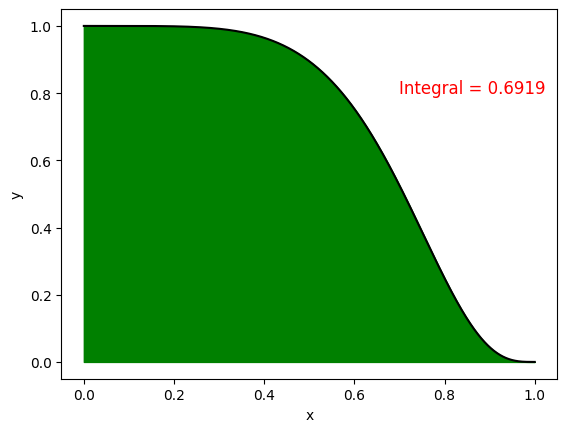

In [60]:
# Exercício 4 a) (Amostragem por importancia)
import numpy as np
import matplotlib.pyplot as plt
N = 10000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Transforma U para seguir a distribuição g(x) usando a inversa da CDF
x = (1 - (U)**(2/9))
#  A itegral e aproximadamente igual à Média de f(x)/g(x)
fx = (1 - (x)**5)**(7/2)
gx = (9/2)*(1 - x)**(7/2)
w = fx/gx
Integral = 1/N * np.sum(w)
print(Integral)

#Plotar o grafico
x = np.linspace(0, 1, N)
curve_x = (1-x**5)**(7/2)
plt.plot(x, curve_x, color='black')
plt.fill_between(x, curve_x, color='green')
plt.text(0.7, 0.8, f'Integral = {Integral:.4f}', fontsize=12, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$
I = \int_{-5}^{10} e^{\,x + x^3}\,dx
  = 15 \int_{0}^{1} e^{\,15y - 5 + (15y - 5)^3}\;dy
$$

In [61]:
# Exercício 4 b) (Integração Monte Carlo)
import numpy as np
N = 10000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Calcular g(Un)
g = np.exp((15*U - 5) + (15*U - 5)**3)
# A itegral e aproximadamente igual à Média de f(x)/g(x)
integral = np.mean(g)*15
print(integral)

inf


<ipython-input-61-e34bc6030f02>:7: RuntimeWarning: overflow encountered in exp
  g = np.exp((15*U - 5) + (15*U - 5)**3)


$$
g(y) \;=\; \frac{15\,e^{15y}}{e^{15}-1},
\quad 0 \le y \le 1
$$

$$
G(y)
\;=\;
\int_{0}^{y} g(y)\,dy
\;=\;
\frac{e^{15y}-1}{e^{15}-1}
$$

$$
y \;=\; G^{-1}(u)
\;=\;
\frac{1}{15}\,\ln\!\bigl(1 + u\,(e^{15}-1)\bigr)
$$

In [62]:
# Exercício 4 b) (Amostragem por importancia)
import numpy as np
N = 100000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Transforma U para seguir a distribuição g(x) usando a inversa da CDF
x = (1/15)*np.log(U*(np.exp(15)-1)+1)
# A itegral e aproximadamente igual à Média de f(x)/g(x)
fx = 15*np.exp((15*x-5)+(15*x-5)**3)
gx = (15)/(np.exp(15)-1)*np.exp(15*x)
w = fx/gx
Integral = 1/N * np.sum(w)
print(Integral)


inf


<ipython-input-62-3bc685512f21>:9: RuntimeWarning: overflow encountered in exp
  fx = 15*np.exp((15*x-5)+(15*x-5)**3)
<ipython-input-62-3bc685512f21>:9: RuntimeWarning: overflow encountered in multiply
  fx = 15*np.exp((15*x-5)+(15*x-5)**3)


$$
\int_{0}^{\infty} x^{2}\,(1 + x^{2})^{-3}\,dx
\;=\;
\int_{0}^{1} \frac{y^{2}\,(1 - y)^{2}}{\bigl(2y^{2} - 2y +1\bigr)^{3}}\,dy
$$

In [65]:
# Exercício 4 c) (Integração Monte Carlo)
import numpy as np
N = 10000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Calcular g(Un)
x = (1/U - 1)
# A itegral e aproximadamente igual à media desses valores
integral = np.mean(((x**2)*(1 + x**2)**-3)/U**2)
print(integral)


0.19256362368288496


$$
g(y) \;=\; 3\,(1 - y)^{2},
\quad 0 \le y \le 1
$$

$$
G(y)
\;=\;
\int_{0}^{y} g(y)\,dy
\;=\;
1 - (1 - y)^{3}
$$

$$
y \;=\; G^{-1}(u)
\;=\;
1 - (1 - u)^{\tfrac{1}{3}}
\;=\;
1 - (u)^{\tfrac{1}{3}}
$$

0.19614486533555395


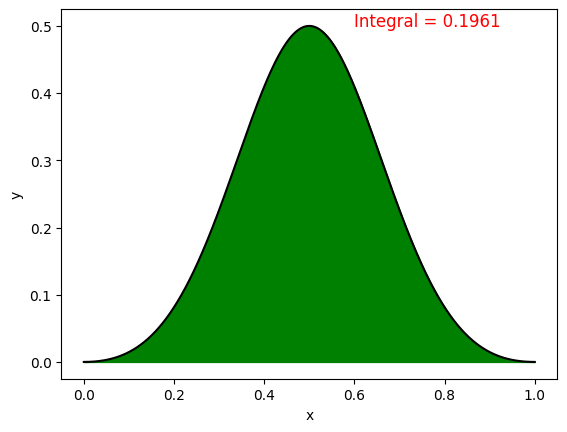

In [67]:
# Exercício 4 c) (Amostragem por importancia)
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
# Gera N numeros aleatorios Un uniformemente distribudos em [0,1]
U = np.random.uniform(0, 1, N)
# Transforma U para seguir a distribuição g(x) usando a inversa da CDF
x = 1 - (1 - U)**(1/3)
# A itegral e aproximadamente igual à Média de f(x)/g(x)
fx = ((x**2)*(1-x)**2)/((2*(x**2)-2*x+1)**3)
gx = 3*(1-x)**2
w = fx/gx
integral = 1/N * np.sum(w)
print(integral)

#Plotar o grafico
y = np.linspace(0, 1, 1000)
curve_y = ((y**2)*(1-y)**2)/((2*(y**2)-2*y+1)**3)
plt.plot(y, curve_y, color='black')
plt.fill_between(y, curve_y, color='green')
plt.text(0.6, 0.5, f'Integral = {integral:.4f}', fontsize=12, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()